In [91]:
include("./main.jl")
using .Main
data = read_data(1)

Measurement([0.195417606 0.003936767578 … NaN NaN; 0.233127449 -0.02130126953 … NaN NaN; … ; 112.1547136 0.003876686096 … NaN NaN; 112.1924226 0.008093833923 … NaN NaN], [1.110390783 1026.244995 … 1.61038607 -2.904595218; 2.110381356 1026.597534 … 2.610381746 -6.52629098; … ; 110.3900408 1026.44873 … 110.8900408 0.7211225407; 111.3900408 1026.361206 … NaN NaN])

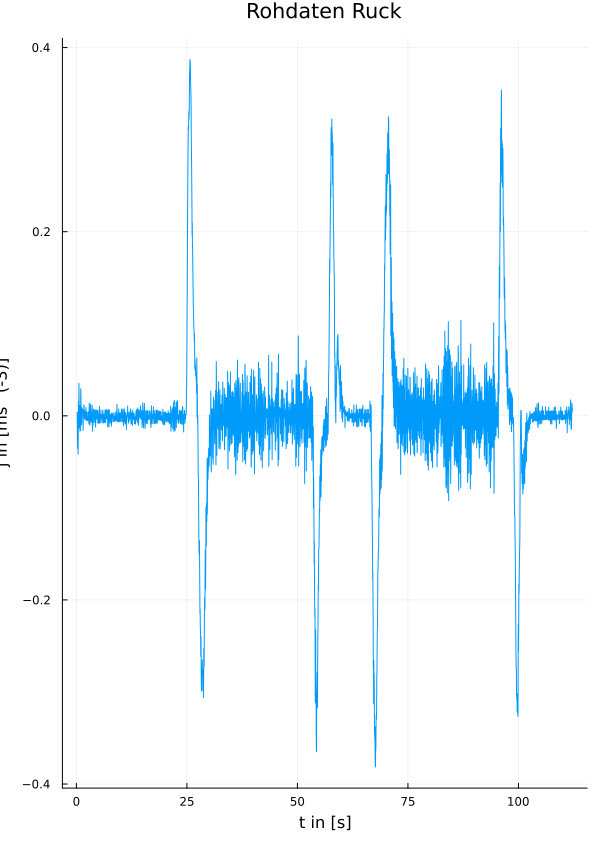

In [92]:
plot_layout(data.acc_and_vel[:, 1], data.acc_and_vel[:, 2], "jerk", "Rohdaten Ruck")

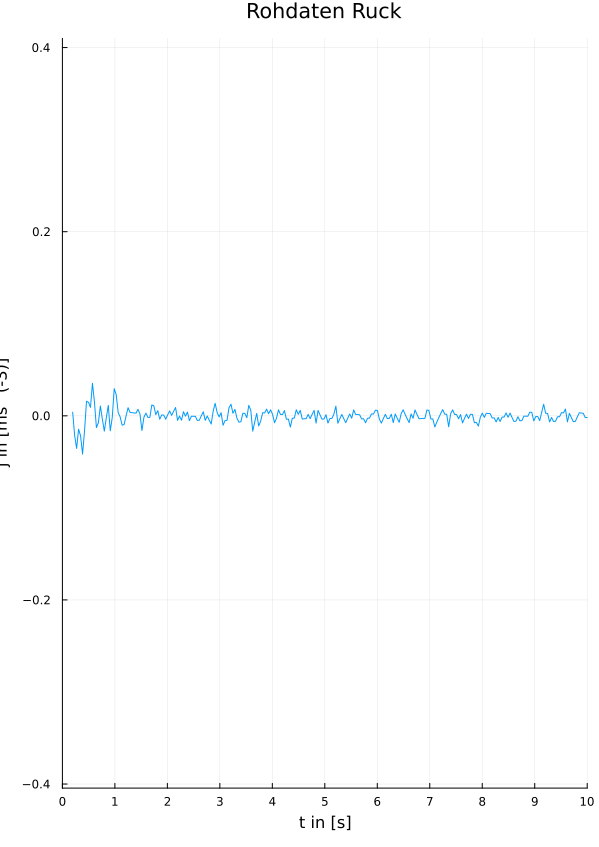

In [93]:
zoom_and_grid(0, 10)

In [94]:
#data = cut(data, 0, 3.5)
#plot_layout(data.acc_and_vel[:, 1], data.acc_and_vel[:, 2], "jerk", "Rohdaten Ruck")

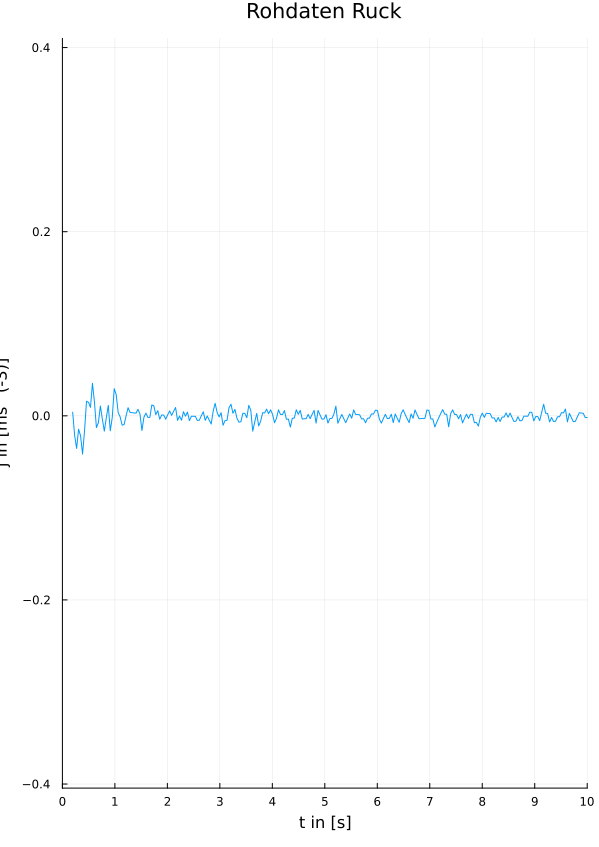

In [95]:
zoom_and_grid(0, 10)

In [96]:
noise_profile(data, 0, 2.5)

Average offset: -0.00017669123988403232 [m/s^3]


-0.00017669123988403232

In [97]:
data = cut(data, 0, 2.5)

Measurement([0.0 -0.0005226135254 … NaN NaN; 0.03770989499999988 -0.0005397796631 … NaN NaN; … ; 109.658993442 0.003876686096 … NaN NaN; 109.696702442 0.008093833923 … NaN NaN], [0.0 1026.597534 … 0.0 -6.52629098; 1.0000007810000002 1027.390015 … 0.999992448 9.431013734; … ; 108.27965944399999 1026.44873 … 108.27965905399999 0.7211225407; 109.27965944399999 1026.361206 … NaN NaN])

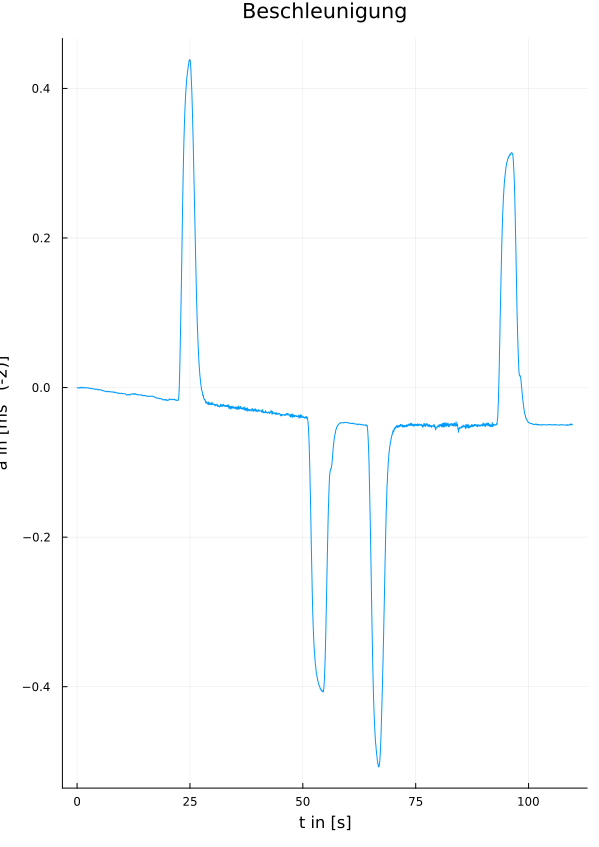

In [98]:
data = acc_by_jerk(data)
plot_layout(data.acc_and_vel[:, 3], data.acc_and_vel[:, 4], "acc", "Beschleunigung")

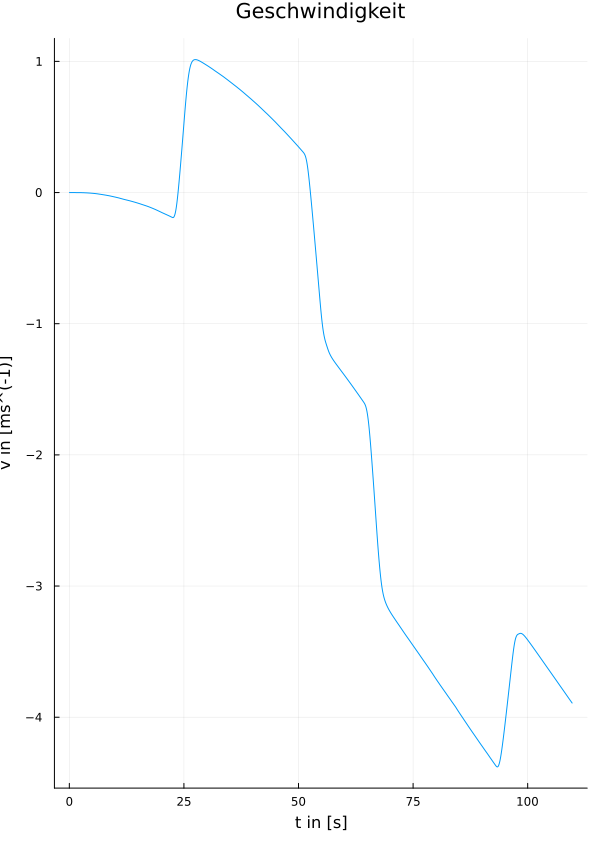

In [99]:
data = vel_by_acc(data)
plot_layout(data.acc_and_vel[:, 3], data.acc_and_vel[:, 5], "vel", "Geschwindigkeit")

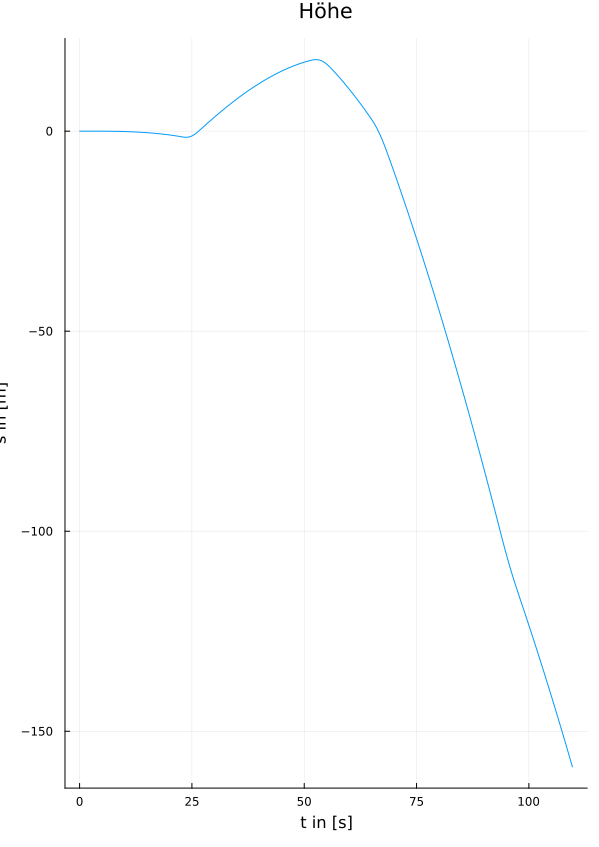

In [100]:
data = dist_by_vel(data)
plot_layout(data.acc_and_vel[:, 3], data.acc_and_vel[:, 6], "dist", "Höhe")

In [101]:
# correct acceleration for linearly increasing error
acc_and_vel = data.acc_and_vel
error_per_step = acc_and_vel[end-1, 4]/length(acc_and_vel[:, 1])
error_array = cumsum(fill(error_per_step, size(acc_and_vel, 1)-1))
acc_and_vel[1:end-1, 4] = acc_and_vel[1:end-1, 4] .- error_array
corrected_data = Measurement(
    acc_and_vel,
    data.prs_and_vel
)
# calculate velocity from corrected acceleration data
corrected_data = vel_by_acc(corrected_data)
# correct velocity for linearly increasing error
acc_and_vel = corrected_data.acc_and_vel
error_per_step = acc_and_vel[end-1, 5]/length(acc_and_vel[:, 1])
error_array = cumsum(fill(error_per_step, size(acc_and_vel, 1)-1))
acc_and_vel[1:end-1, 5] = acc_and_vel[1:end-1, 5] .- error_array
corrected_data = Measurement(
    acc_and_vel,
    data.prs_and_vel
)
# calculate distance from corrected veloccity data
corrected_data = dist_by_vel(corrected_data)
# correct distance for linearly increasing error
acc_and_vel = corrected_data.acc_and_vel
error_per_step = acc_and_vel[end-1, 6]/length(acc_and_vel[:, 1])
error_array = cumsum(fill(error_per_step, size(acc_and_vel, 1)-1))
acc_and_vel[1:end-1, 6] = acc_and_vel[1:end-1, 6] .- error_array
corrected_data = Measurement(
    acc_and_vel,
    data.prs_and_vel
)

Measurement([0.0 -0.0005226135254 … 0.00041090366509276 -0.0018158003208096467; 0.03770989499999988 -0.0005397796631 … 0.0008216767037965818 -0.0036161104326392648; … ; 109.658993442 0.003876686096 … -0.0004110098805869544 0.0018312954548829197; 109.696702442 0.008093833923 … NaN NaN], [0.0 1026.597534 … 0.0 -6.52629098; 1.0000007810000002 1027.390015 … 0.999992448 9.431013734; … ; 108.27965944399999 1026.44873 … 108.27965905399999 0.7211225407; 109.27965944399999 1026.361206 … NaN NaN])

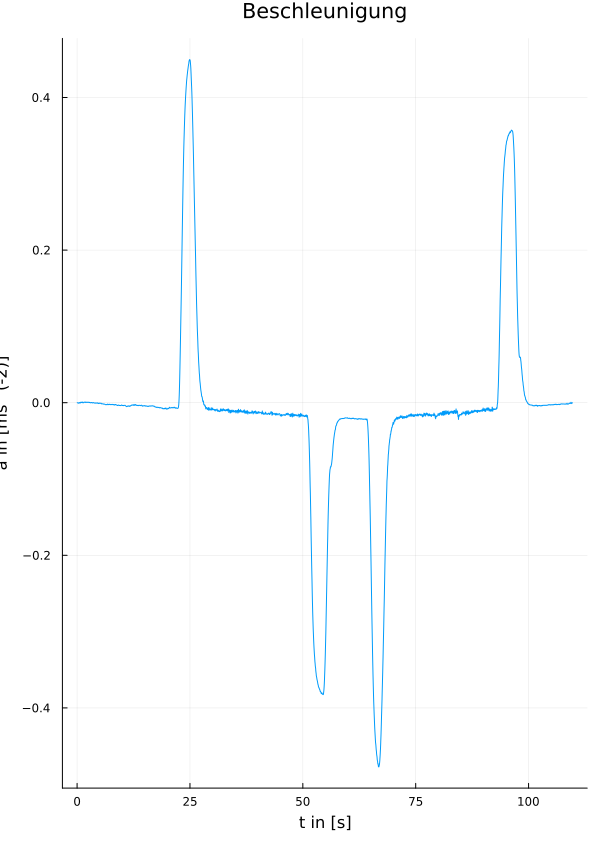

In [102]:
plot_layout(corrected_data.acc_and_vel[:, 3], corrected_data.acc_and_vel[:, 4], "acc", "Beschleunigung")

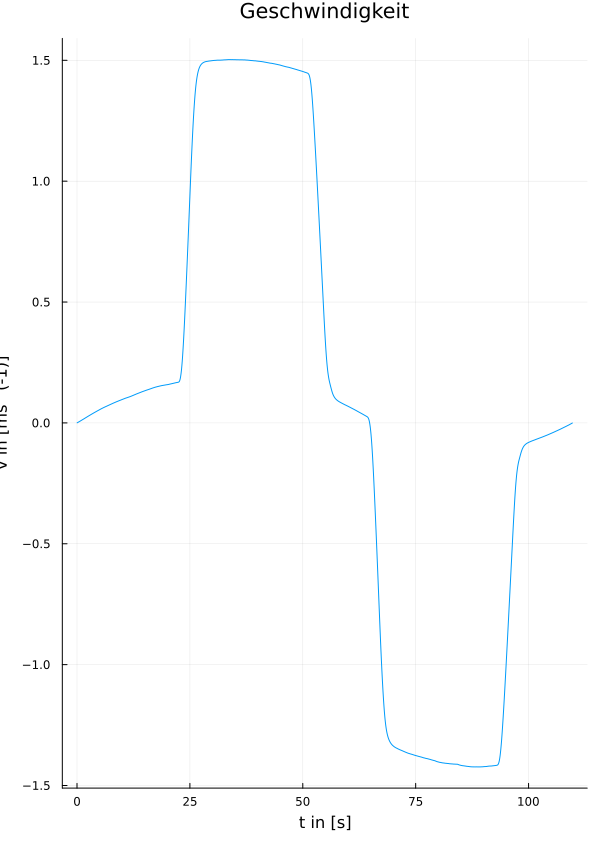

In [103]:
plot_layout(corrected_data.acc_and_vel[:, 3], corrected_data.acc_and_vel[:, 5], "vel", "Geschwindigkeit")

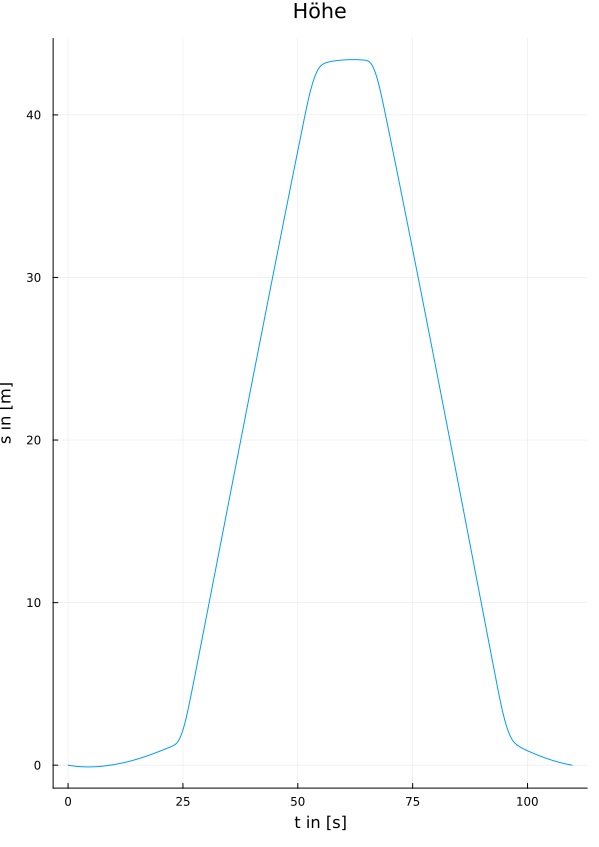

In [104]:
plot_layout(corrected_data.acc_and_vel[:, 3], corrected_data.acc_and_vel[:, 6], "dist", "Höhe")

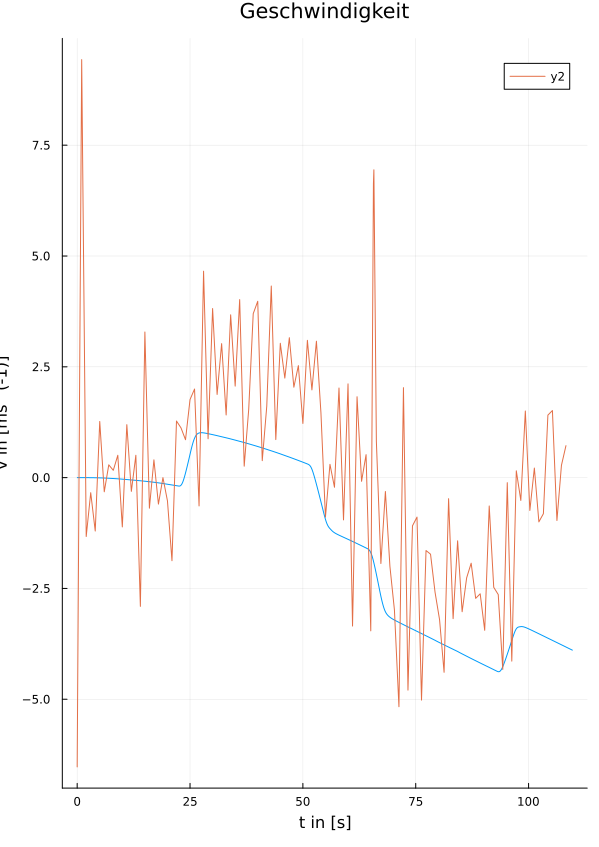

In [105]:
# final plot
plot_layout(data.acc_and_vel[:, 3], data.acc_and_vel[:, 5], "vel", "Geschwindigkeit")
plot!(data.prs_and_vel[:, 4], data.prs_and_vel[:, 5])

In [106]:
vel_average = Statistics.mean(data.acc_and_vel[1:end-1, 5])
new_vel = copy(data.acc_and_vel[1:end-1, 5]) .- vel_average
x = [data.acc_and_vel[1, 3], data.acc_and_vel[find_closest(new_vel, 0), 3], data.acc_and_vel[end-1, 3]]
y = [new_vel[1], new_vel[find_closest(new_vel, 0)], new_vel[end]]
plot(data.acc_and_vel[1:end-1, 3], new_vel)
plot!(poly_fit(x, y))

UndefVarError: UndefVarError: poly_fit not defined